In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [6]:
epath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [21]:
# This will drop the columns if they exist, and do nothing if they don't
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Get statistical summary of the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
floor_counts = df["floors"].value_counts().to_frame()
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


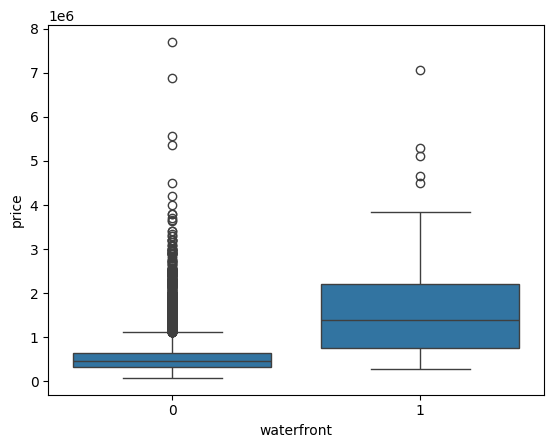

In [9]:
sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

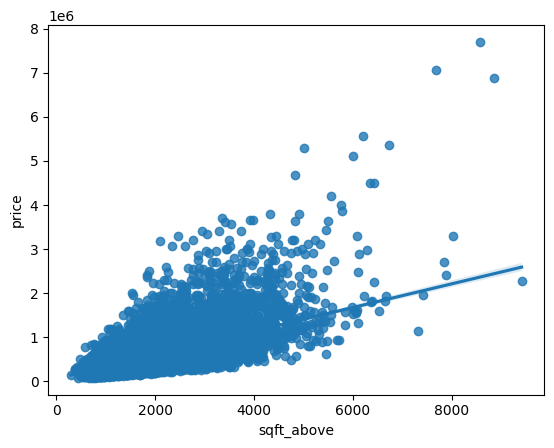

In [10]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.show()

In [11]:
X = df[["sqft_living"]]
y = df["price"]


lm = LinearRegression()
lm.fit(X, y)


r2_single = lm.score(X, y)
print("R^2 (sqft_living):", r2_single)

R^2 (sqft_living): 0.4928532179037931


In [13]:

# Your original list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# --- FIX: Add this line to remove rows with missing values ---
df.dropna(subset=features + ['price'], inplace=True)

# Now, create your X and y variables from the cleaned dataframe
X_multi = df[features]
y_multi = df['price']

# The rest of your code will now work correctly
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y_multi)

r2_multi = lm_multi.score(X_multi, y_multi)
print(f"R^2 (Multiple Features): {r2_multi}")

R^2 (Multiple Features): 0.6578409661299084


In [14]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
"view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]


X_multi = df[features]
y_multi = df["price"]


lm_multi = LinearRegression()
lm_multi.fit(X_multi, y_multi)


r2_multi = lm_multi.score(X_multi, y_multi)
print("R^2 (Multiple Features):", r2_multi)

R^2 (Multiple Features): 0.6578409661299084


In [15]:
Input = [("scale", StandardScaler()), ("poly", PolynomialFeatures(degree=2)), ("model", LinearRegression())]
pipeline = Pipeline(Input)
pipeline.fit(X_multi, y_multi)


r2_pipeline = pipeline.score(X_multi, y_multi)
print("R^2 (Pipeline with Polynomial):", r2_pipeline)

R^2 (Pipeline with Polynomial): 0.7513824681113679


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=1)


ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)


r2_ridge = ridge_model.score(X_test, y_test)
print("R^2 (Ridge Regression):", r2_ridge)

R^2 (Ridge Regression): 0.6700714818795318


In [17]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)


r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2 (Polynomial + Ridge):", r2_ridge_poly)

R^2 (Polynomial + Ridge): 0.6951236743055775
